In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\mukki\LOAN DATA\train_lending_club.csv")

print(df.shape)
print(df.info())
df.head()

(236846, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236846 entries, 0 to 236845
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   issue_d                   236846 non-null  object 
 1   sub_grade                 236846 non-null  object 
 2   term                      236846 non-null  object 
 3   home_ownership            236846 non-null  object 
 4   fico_range_low            236846 non-null  int64  
 5   total_acc                 236846 non-null  int64  
 6   pub_rec                   236846 non-null  int64  
 7   revol_util                236846 non-null  float64
 8   annual_inc                236846 non-null  float64
 9   int_rate                  236846 non-null  float64
 10  dti                       236846 non-null  float64
 11  purpose                   236846 non-null  object 
 12  mort_acc                  236846 non-null  int64  
 13  loan_amnt                 23684

,issue_d,sub_grade,term,home_ownership,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,...,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line
0,01-01-2014,D1,60 months,MORTGAGE,660,18,0,86.8,40440.0,16.99,...,0,AR,f,664,17264,11024793,11,2,1,478656.0
1,01-01-2014,C4,60 months,MORTGAGE,740,26,0,103.5,59000.0,15.61,...,0,VT,f,744,6725,10596078,8,3,1,541728.0
2,01-01-2014,A4,36 months,RENT,700,47,0,11.4,40000.0,7.90,...,0,TX,w,704,7613,10775616,27,1,1,657590.4
3,01-01-2014,D1,60 months,MORTGAGE,665,26,0,56.2,70000.0,16.99,...,0,IN,f,669,14173,10765610,9,11,1,328838.4
4,01-01-2014,C3,36 months,MORTGAGE,700,15,1,67.1,120000.0,14.98,...,0,LA,f,704,2549,10794837,8,2,1,305164.8


Data cleaning and Missing values

In [2]:
df.isnull().sum().sort_values(ascending=False).head(20)


issue_d                 0
sub_grade               0
term                    0
home_ownership          0
fico_range_low          0
total_acc               0
pub_rec                 0
revol_util              0
annual_inc              0
int_rate                0
dti                     0
purpose                 0
mort_acc                0
loan_amnt               0
application_type        0
installment             0
verification_status     0
pub_rec_bankruptcies    0
addr_state              0
initial_list_status     0
dtype: int64

Target Variable Distribution

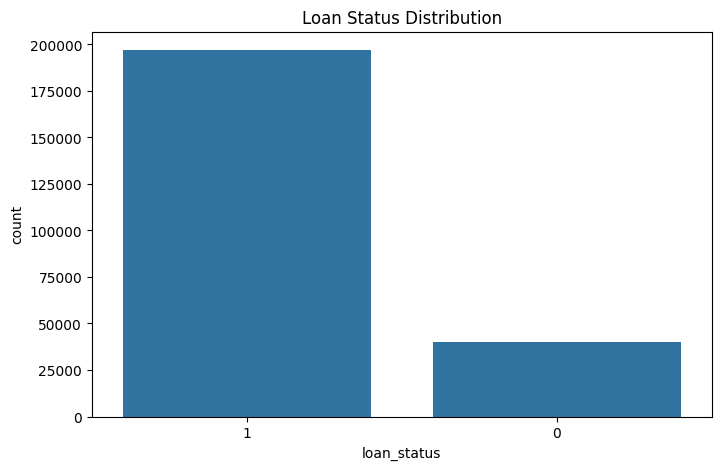

loan_status
1    83.159099
0    16.840901
Name: proportion, dtype: float64

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xticks(rotation= 0)
plt.show()

df['loan_status'].value_counts(normalize=True) * 100

1. the dataset is imbalanced - most borrowers repay their loans(83%), while only ~17% default

Loan Amount Analysis

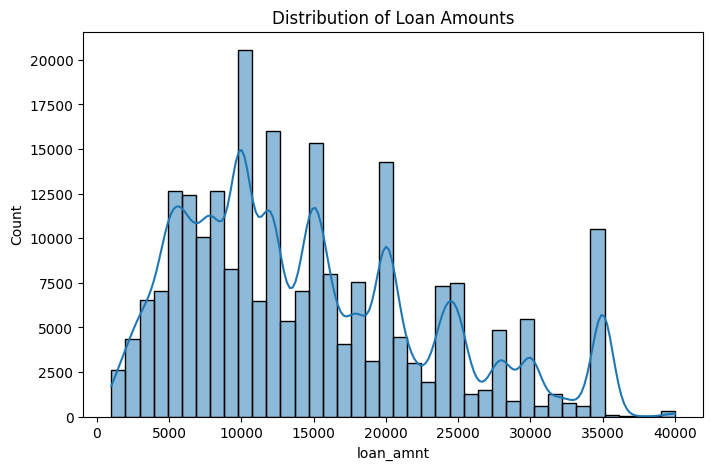

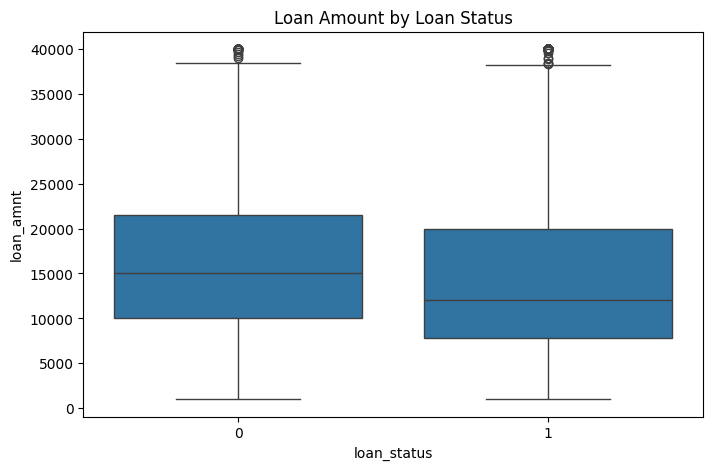

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['loan_amnt'], bins=40, kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='loan_status', y="loan_amnt")
plt.title("Loan Amount by Loan Status")

plt.show()

Borrowers usually apply for loans around $10k-$15k, but loan amounts vary widely.

Defaults are somewhat more common among larger loans, suggestion loan size could be a risk factor.

Lenders should pay extra attention to high-value loans, as defaulters in those can cause higher financial loss.

Interest Rate & Default

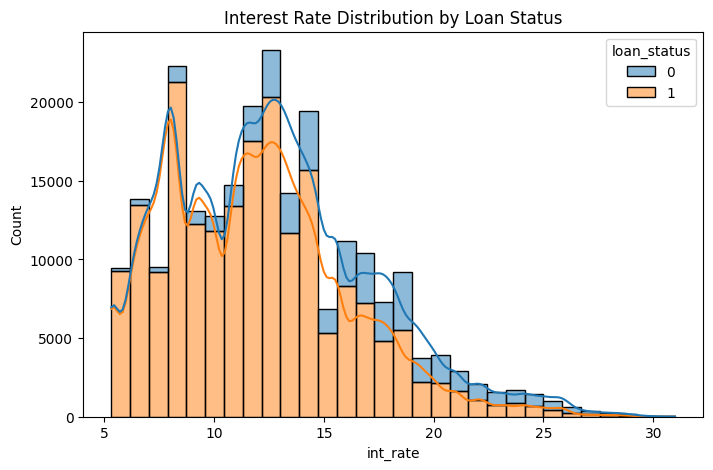

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df, x='int_rate', hue='loan_status', bins=30, kde=True, multiple='stack')
plt.title('Interest Rate Distribution by Loan Status')
plt.show()

Interest rate is strongly correlated with default risk.

Borrowers paying higher interest (>15%) are much more likely to default

LendingClub's pricing strategy (charging high rate for risky borrowers) is not fully compensating for the increased risk - many still default

Lenders should consider stricter approvals for very high interest loans.

Loan Grade & Risk

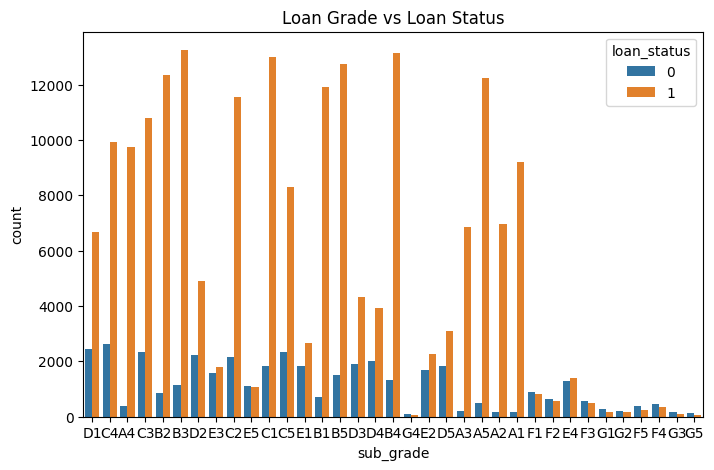

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sub_grade', hue='loan_status')
plt.title('Loan Grade vs Loan Status')
plt.show()

Loan sub-grade is one of the strongest predictors of default.

Borrowers in A & B grades are relatively safe investments.

High-risk borrowers (E, G, F) default frequently, even though they are charged higher interest.

A potential investment strategy : focus on A-C grade loans to balance returns and default risk,

Income vs Loan Risk

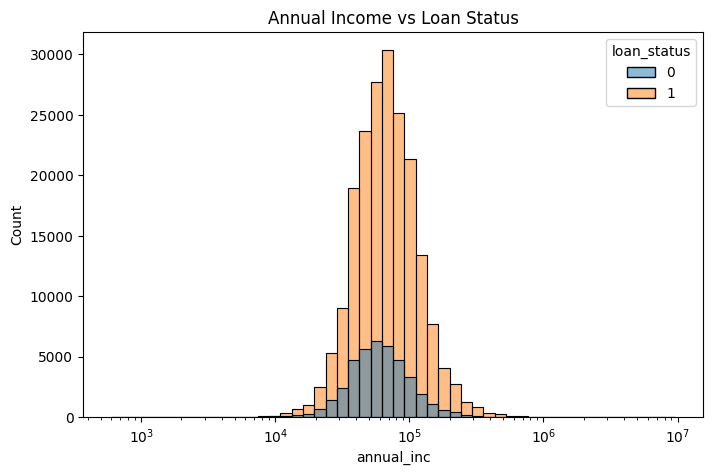

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df, x='annual_inc', hue='loan_status',log_scale=(True, False), bins=50)
plt.title('Annual Income vs Loan Status')
plt.show()

Income is correlated with repayment ability: lower-income borrowers are riskier,

However, high income does not guarantee repayment - defaults occur across all income groups.

Thus, income should not be the only factor for risk assessment; it must be combined with credit grade, DTI, and loan amount for better prediction.

Categorical Features

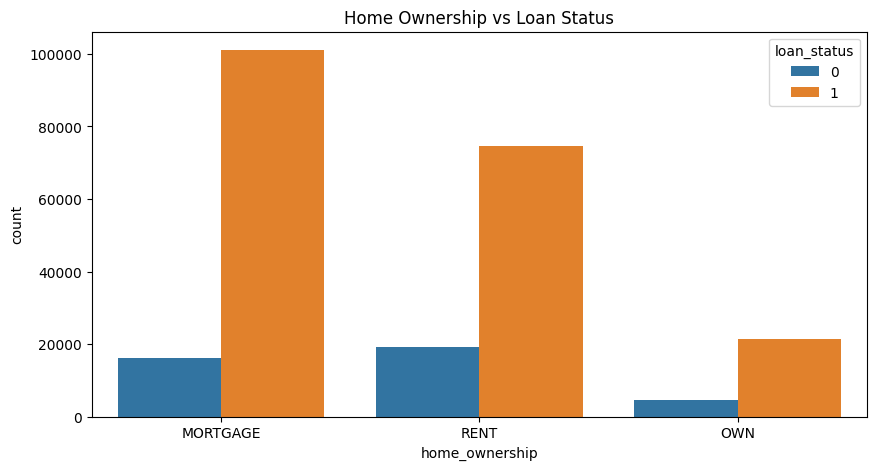

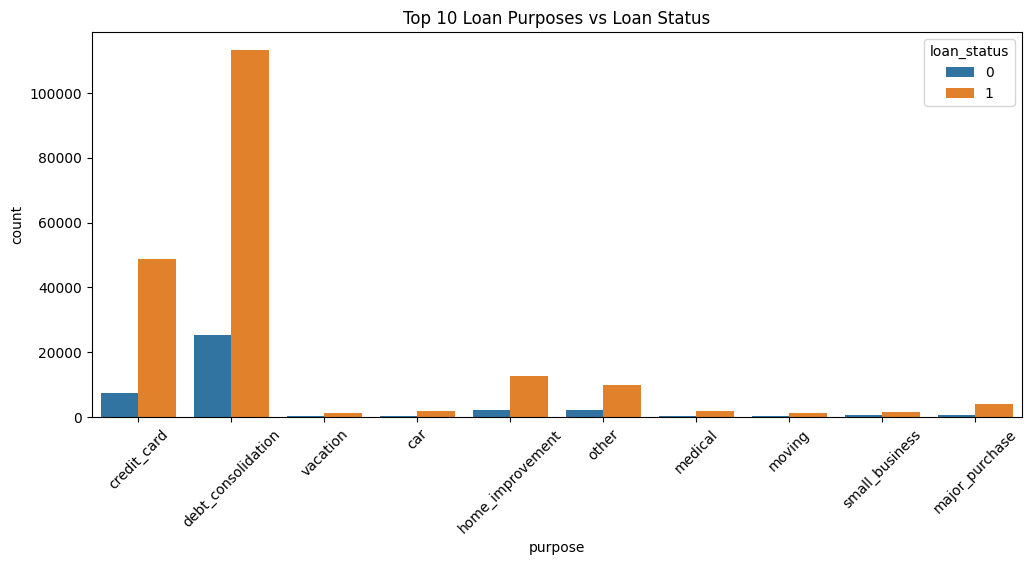

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='home_ownership', hue='loan_status' )
plt.title('Home Ownership vs Loan Status')
plt.show()


plt.figure(figsize=(12,5))
top_purposes = df['purpose'].value_counts().head(10).index
sns.countplot(data=df[df['purpose'].isin (top_purposes)], x='purpose', hue='loan_status')
plt.title('Top 10 Loan Purposes vs Loan Status')
plt.xticks(rotation= 45)
plt.show()

Home Ownership vs Loan Status
    Home ownership type influences repayment: renters are more likely to default compared to owners or mortgage holders.
    Mortgage borrowers dominate the dataset, so lenders should pay closer attention to this group.
    Owning a home reduces loan risk, but is not a guarantee against default.

Top 10 Loan Purposes vs Loan Status
    Debt consolidation is the leading purpose for loans and has the most defaults in absolute terms. but repayment rate are still strong overall.
    Credit card loans show relatively higher default ratios compared to debt consolidation.
    Small business, medical, and vacation loans are high-risk categories - despite lower total volumes, their borrowers are more likely to default.
    lenders should carefully asses application in these riskier categories. 

Correlation Heatmap

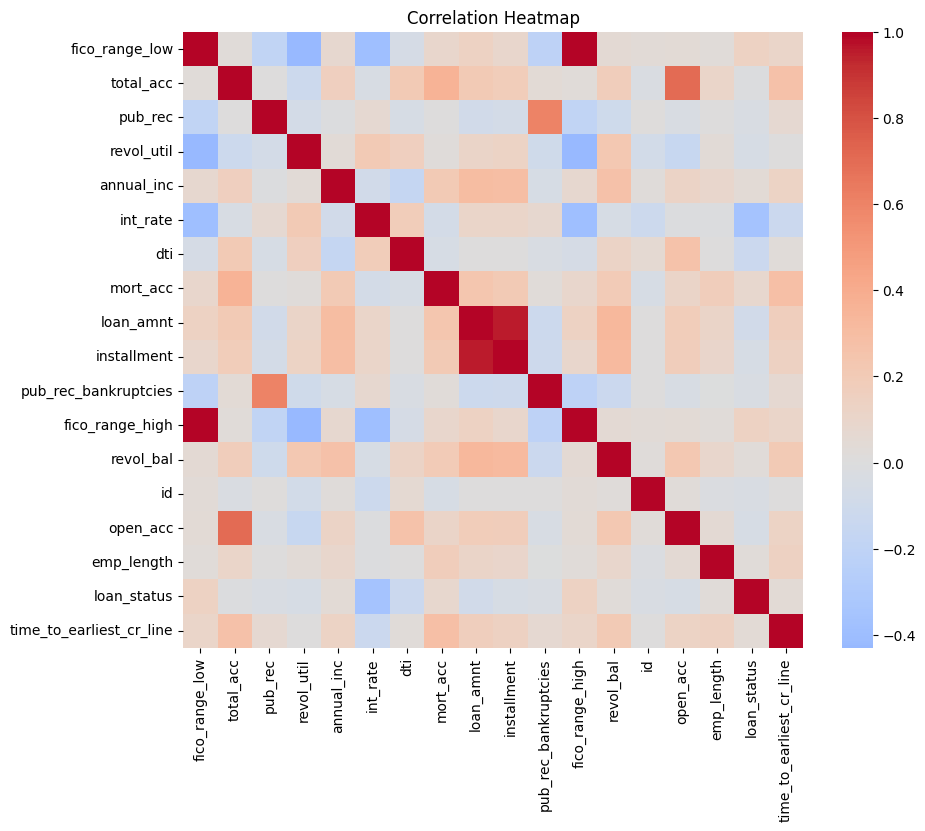

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only= True), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Some features are redundant (fico_range_low vs fico_range_high, loan_amnt vs installment) - one can be dropped to reduce multicollinearity.

Fico score and interest rate are inversely correlated, confirming credit risk assessment is working,

Default (loan_status) does not strongly correlate with any single feature - indicates that default risk is multifactorial, not linear.

Features like int_rate, dti, revol_util may contribute more to predicting loan defaults than others like emp_length or time_to_earliest_cr_line

Feature Engineering for Insights

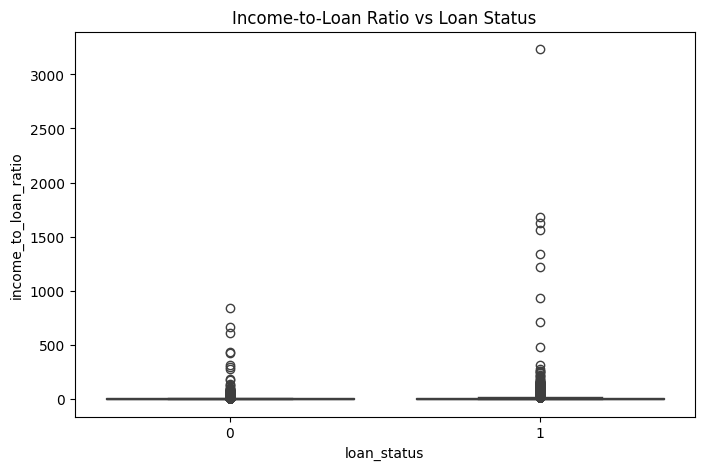

In [28]:
df['income_to_loan_ratio'] = df['annual_inc'] / (df['loan_amnt'] + 1)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='loan_status', y='income_to_loan_ratio')
plt.title('Income-to-Loan Ratio vs Loan Status')
plt.show()

The income-to-loan ratio alone is not a strong differentiator between good and bad loans.

It may still be useful in combination with other features (like FICO score, DTI, revol_utill, etc.).

Outliers should probably be handled (e.g., capping ratios at a reasonable value like 99th percentile) before model training.